In [6]:
%cd ./bio/binfo1-work/

[Errno 2] No such file or directory: './bio/binfo1-work/'
/home/ggy/bio/binfo1-work


In [7]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_rows', 100)

In [8]:
dd = pd.read_csv('p_pileup.csv')
dm = pd.read_csv('m_pileup.csv')

In [9]:
(chr1,pos1) = (dd[(dd['_ref']=='G')&(dd['count']>=50)].chrom, dd[(dd['_ref']=='G')&(dd['count']>=50)].pos)
(chr2,pos2) = (dm[(dm['_ref']=='C')&(dm['count']>=50)].chrom, dm[(dm['_ref']=='C')&(dm['count']>=50)].pos)

In [10]:
f = open('p.bed', 'w')
for i,j in zip(chr1,pos1):
    f.write(i+'\t'+str(j-16)+'\t'+str(j+15)+'\tmyseq\t10\t+\n')
f.close()
f = open('m.bed', 'w')
for i,j in zip(chr2,pos2):
    f.write(i+'\t'+str(j-16)+'\t'+str(j+15)+'\tmyseq\t10\t-\n')
f.close()

In [11]:
!bedtools getfasta -fi mm39.fa -bed p.bed -s -name -fo motif.txt

In [12]:
!bedtools getfasta -fi mm39.fa -bed m.bed -s -name -fo motif2.txt

In [13]:
d2=pd.read_csv('motif.txt')
d2 = d2[~d2[d2.columns[0]].str.contains('>')]
d2=d2.rename(columns={d2.columns[0]:'seq'})

In [14]:
dm2=pd.read_csv('motif2.txt')
dm2 = dm2[~dm2[dm2.columns[0]].str.contains('>')]
dm2=dm2.rename(columns={dm2.columns[0]:'seq'})


In [15]:
d2

,seq
0,GTTGCCCAGTATGACGGTGCATACAAGGTTA
2,GAAATACGGTGACAAGAGGATCATCGACACC
4,TTCCTTCACGGATTGGGAGATACAGGGTAGG
6,TCACCAGATTCCCAGGAAGATGAATCTGGAA
8,CTTTTGTTCCAGGGAGGCGCCTTGTCTTTAT
...,...
20910,CAGCGACTTATGCCTGGTGGTTACAGGACAC
20912,TAGAGACTTATACCTGGTGGTTACAGGACAC
20914,CAGCGACTTATGCCTGGTGGTTACAGGACAC
20916,TTTAAGAATGGGCGGGTCTGCCCTTCACTCT


In [16]:
dm2

,seq
0,GATGGAGAGTGCCATGGAGGACCTGCAGGAC
2,CAGACTTGTGAGCCAGACGGGCTGCACATGG
4,TCCAGCCGCTTAAGAGGGATTATGGAGTCCA
6,TTTTCTTGTAGGAAAGACGTCCAAGAGATCG
8,GATGTGCAGATTTCTGAGAGGACAAATAAAC
...,...
20816,TTTCTGAGGCAGGGGGATGACTGTGAGTGAT
20818,ACTATCGACAGAGCAGTGGTTCTGCAAATGC
20820,TTCGGGACTTAGAACGTGGATGCCACTTGTT
20822,ACTCTTAGGAAAATGGAAGATATGGTCGCCG


In [18]:
d2['hexamer']=d2['seq'].str[13:19]

In [19]:
dm2['hexamer']=dm2['seq'].str[13:19]

In [21]:
df = pd.concat([d2,dm2])

In [22]:
df

,seq,hexamer
0,GTTGCCCAGTATGACGGTGCATACAAGGTTA,ACGGTG
2,GAAATACGGTGACAAGAGGATCATCGACACC,AAGAGG
4,TTCCTTCACGGATTGGGAGATACAGGGTAGG,TGGGAG
6,TCACCAGATTCCCAGGAAGATGAATCTGGAA,AGGAAG
8,CTTTTGTTCCAGGGAGGCGCCTTGTCTTTAT,GAGGCG
...,...,...
20816,TTTCTGAGGCAGGGGGATGACTGTGAGTGAT,GGGATG
20818,ACTATCGACAGAGCAGTGGTTCTGCAAATGC,CAGTGG
20820,TTCGGGACTTAGAACGTGGATGCCACTTGTT,ACGTGG
20822,ACTCTTAGGAAAATGGAAGATATGGTCGCCG,TGGAAG


In [24]:
hexa=pd.DataFrame(df['hexamer'].value_counts().sort_values(ascending=False))
hexa['freq'] =hexa['hexamer']/hexa['hexamer'].sum()
hexa.head(10)
# motif frequency

,hexamer,freq
AAGGAG,512,0.024529
AAGAGA,345,0.016529
GAGGAG,340,0.016289
AAGAGG,319,0.015283
AAGAAG,275,0.013175
AAGGTG,272,0.013031
AGGAGA,196,0.009390
GAGAAG,194,0.009294
GAGAGA,185,0.008863
TGGAGA,180,0.008624


In [25]:
# AAGNHG motif               seq1 -> weblogo
df1=df[df.iloc[:, 1].str.match('^AAG.[A|C|T]G$')]
df1['seq'].to_csv('seq1.txt', index=False,header=False)

In [26]:
# AAGNGH motif               seq2 -> weblogo
df2=df[df.iloc[:, 1].str.match('^AAG.G[A|C|T]$')]
df2['seq'].to_csv('seq2.txt', index=False,header=False)

In [28]:
df1.iloc[:,0]

26       ATATCAAATCTTAAAGATGCAAAGAATCCAA
44       GGTTTGAAATGAAAAGAAGTTCCGAGGACAA
114      TCTTTTCCAGGGAAAGGCGTCAGAGAAACTC
134      GAGAATGTTGGCCAAGATGGGGCAGAGTGAT
168      TCATGAAGCGTCTAAGGTGTGTGTTGTGAAT
                      ...               
20708    GAGTCCAAAGATCAAGGCGTGAAAAATCTCA
20758    TGCTGAGATTGTTAAGGAGATGACTGAGGTC
20764    GAACTCCGATCTCAAGGCGCAGCTGCGTGAA
20770    TAACGGAGAATTCAAGGAGCTCAAACTGACT
20808    TATGAGTTTCTTAAAGGAGTTGGCAGAATAT
Name: seq, Length: 1593, dtype: object

In [30]:
seqs=df1.iloc[:,0]

In [31]:
seqs2=df2.iloc[:,0]

In [32]:
h1 = pd.DataFrame(np.nan, index=range(-15, 16), columns=range(-15, 16))
h2 = h1.copy()

In [33]:
for i in range(31):
    for j in range(31):
        count=0
        for seq in seqs:
            if seq[i]+seq[j] in ['AT','CG','TA','GC']:
                count+=1
        count/=len(seqs)    
        h1.loc[i-15,j-15] = count

In [34]:
for i in range(31):
    for j in range(31):
        count=0
        for seq in seqs2:
            if seq[i]+seq[j] in ['AT','CG','TA','GC']:
                count+=1
        count/=len(seqs2)    
        h2.loc[i-15,j-15] = count

In [35]:
h1

,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,...,6,7,8,9,10,11,12,13,14,15
-15,0.000000,0.162586,0.230383,0.240427,0.256748,0.226616,0.232894,0.253610,0.260515,0.254865,...,0.260515,0.261770,0.224105,0.247960,0.237288,0.241055,0.240427,0.240427,0.258632,0.238544
-14,0.162586,0.000000,0.182674,0.246704,0.229755,0.257376,0.257376,0.256121,0.242938,0.238544,...,0.259887,0.251726,0.227244,0.248588,0.247332,0.262398,0.252354,0.261142,0.246077,0.271186
-13,0.230383,0.182674,0.000000,0.170119,0.232894,0.244821,0.232894,0.215317,0.272442,0.245449,...,0.248588,0.249215,0.266792,0.247960,0.247960,0.269931,0.259887,0.255493,0.254865,0.237288
-12,0.240427,0.246704,0.170119,0.000000,0.178908,0.238544,0.260515,0.255493,0.241682,0.246077,...,0.253610,0.257376,0.254865,0.263653,0.260515,0.266164,0.264281,0.265537,0.251099,0.237916
-11,0.256748,0.229755,0.232894,0.178908,0.000000,0.188952,0.246077,0.229127,0.258632,0.247960,...,0.246077,0.226616,0.257376,0.249215,0.256121,0.264281,0.270559,0.238544,0.255493,0.246704
-10,0.226616,0.257376,0.244821,0.238544,0.188952,0.000000,0.159448,0.232894,0.276836,0.252982,...,0.248588,0.242310,0.262398,0.256748,0.266792,0.298807,0.277464,0.261142,0.254237,0.237288
-9,0.232894,0.257376,0.232894,0.260515,0.246077,0.159448,0.000000,0.188324,0.253610,0.269931,...,0.237288,0.246704,0.256121,0.271814,0.307596,0.252354,0.265537,0.233522,0.232266,0.268048
-8,0.253610,0.256121,0.215317,0.255493,0.229127,0.232894,0.188324,0.000000,0.210295,0.248588,...,0.244193,0.278719,0.264281,0.331450,0.246704,0.257376,0.266792,0.236033,0.249215,0.265537
-7,0.260515,0.242938,0.272442,0.241682,0.258632,0.276836,0.253610,0.210295,0.000000,0.148148,...,0.262398,0.268675,0.352166,0.286252,0.268675,0.266792,0.270559,0.217828,0.245449,0.254237
-6,0.254865,0.238544,0.245449,0.246077,0.247960,0.252982,0.269931,0.248588,0.148148,0.000000,...,0.292530,0.401130,0.306968,0.279347,0.239171,0.249215,0.256121,0.234149,0.251726,0.276836


<AxesSubplot: >

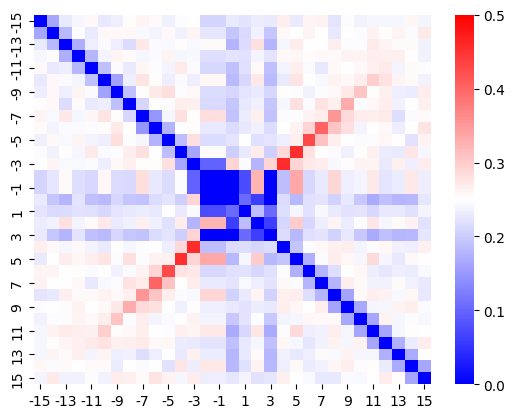

In [36]:
import seaborn as sns

sns.heatmap(h1,cmap='bwr', vmin=0, vmax=0.5)

<AxesSubplot: >

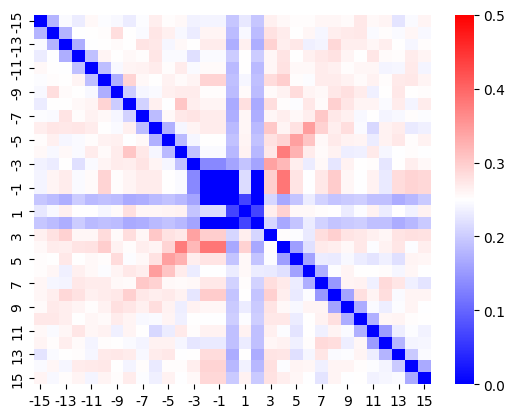

In [37]:
import seaborn as sns

sns.heatmap(h2,cmap='bwr', vmin=0, vmax=0.5)

In [39]:
h2[h2>=0.3].stack().index.tolist()

[(-8, -4),
 (-7, 7),
 (-6, 3),
 (-6, 6),
 (-5, 5),
 (-5, 6),
 (-4, -8),
 (-4, 4),
 (-4, 5),
 (-3, 3),
 (-3, 4),
 (-2, 4),
 (-1, 4),
 (3, -6),
 (3, -3),
 (4, -4),
 (4, -3),
 (4, -2),
 (4, -1),
 (5, -5),
 (5, -4),
 (6, -6),
 (6, -5),
 (7, -7)]